In [47]:
import pandas as pd
asb_sig = pd.read_csv("/oak/stanford/groups/akundaje/projects/african_omics/outs/10_15_2022_per_ancestry_scores/tables/sig.asb.scores.tsv", sep="\t", header=0)

In [60]:
atac_model=pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds_asb/atac/ATAC/summary.mean.variant_scores_new_2.tsv", sep='\t', header=0)
atac_model_50m=pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds_asb/atac_50M/ATAC_50M/summary.mean.variant_scores_new_2.tsv", sep='\t', header=0)
dnase_model=pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds_asb/dnase_predss/DNASE/summary.mean.variant_scores_new_2.tsv", sep='\t', header=0)


In [61]:
atac_model["jsd_sign.mean"] = atac_model["jsd.mean"]*np.sign(atac_model["logfc.mean"])
atac_model_50m["jsd_sign.mean"] = atac_model_50m["jsd.mean"]*np.sign(atac_model_50m["logfc.mean"])
dnase_model["jsd_sign.mean"] = dnase_model["jsd.mean"]*np.sign(dnase_model["logfc.mean"])


In [62]:
atac_model.shape

(7559, 25)

In [63]:
asb_sig.shape

(7559, 72)

In [64]:
asb_sig.head()

,chr,pos,allele1,allele2,rsid,Esan.mean.logfc,Esan.mean.abs_logfc,Esan.mean.jsd,Esan.mean.abs_logfc_x_jsd,Esan.mean.abs_logfc_x_jsd_x_max_percentile,...,afr.mean.jsd,eur.mean.logfc,eur.mean.abs_logfc,eur.mean.jsd,afr.mean.abs_logfc.pval,afr.mean.jsd.pval,eur.mean.abs_logfc.pval,eur.mean.jsd.pval,variantID,meanLog2FC
0,chr1,976215,A,G,1_976215_A_G,0.148617,0.186169,0.029973,0.005416,0.003405,...,0.036430,-0.027498,0.218047,0.052142,0.048619,0.019607,0.048772,0.015193,1_976215_A_G,-1.852605
1,chr1,1000079,A,G,1_1000079_A_G,0.001207,0.012582,0.017991,0.000220,0.000198,...,0.021034,0.004492,0.028228,0.019831,0.457881,0.074831,0.783580,0.160148,1_1000079_A_G,-2.087074
2,chr1,1038800,T,G,1_1038800_G_T,0.013834,0.078046,0.014067,0.001314,0.000522,...,0.014347,-0.002473,0.040055,0.015031,0.230560,0.212956,0.603360,0.309351,1_1038800_G_T,3.172063
3,chr1,1038819,T,C,1_1038819_C_T,0.139453,0.139453,0.021787,0.003160,0.001386,...,0.020315,-0.208648,0.208648,0.021750,0.071184,0.081884,0.053131,0.128314,1_1038819_C_T,2.390945
4,chr1,1038845,G,A,1_1038845_A_G,-0.354500,0.354500,0.029879,0.010773,0.006039,...,0.032463,0.552679,0.552679,0.034941,0.006371,0.025877,0.006414,0.041549,1_1038845_A_G,2.163432


In [65]:
asb_sig.shape

(7559, 72)

In [66]:
import scipy.stats

In [70]:
atac_model.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'log_prob_log2s.mean', 'abs_logfc_x_jsd.mean',
       'abs_logfc_x_jsd.mean.pval', 'max_percentile.mean',
       'max_percentile.mean.pval', 'logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'jsd_sign.mean'],
      dtype='object')

In [80]:
import numpy as np
asb_sig["sign_jsd"] = asb_sig["GM12878.ENCSR637XSC.mean.jsd"] * np.sign( asb_sig["GM12878.ENCSR637XSC.mean.logfc"])

atac_model.loc[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2], "jsd_sign.mean"] = -1* atac_model[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2]]["jsd_sign.mean"]

scipy.stats.pearsonr(asb_sig["meanLog2FC"], asb_sig["sign_jsd"])

(0.38643911409950277, 9.28356026162717e-268)

In [77]:
dnase_model.loc[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2], "jsd_sign.mean"] = -1* dnase_model[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2]]["jsd_sign.mean"]
atac_model_50m.loc[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2], "jsd_sign.mean"] = -1* atac_model_50m[asb_sig["allele1"] != asb_sig["rsid"].str.split('_').str[2]]["jsd_sign.mean"]



In [81]:
print("ATAC (572M)", scipy.stats.pearsonr(asb_sig["meanLog2FC"], atac_model["jsd_sign.mean"]))
print("DNase", scipy.stats.pearsonr(asb_sig["meanLog2FC"], dnase_model["jsd_sign.mean"]))
print("ATAC (50M)", scipy.stats.pearsonr(asb_sig["meanLog2FC"], atac_model_50m["jsd_sign.mean"]))

ATAC (572M) (0.6409080506614266, 0.0)
DNase (0.6443754935588125, 0.0)
ATAC (50M) (0.6325856097326924, 0.0)


<Figure size 576x360 with 0 Axes>

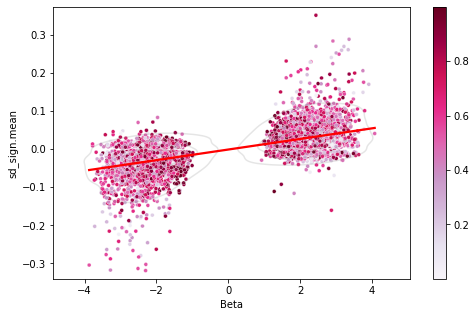

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,5))

data = pd.DataFrame()
data["sd_sign.mean"] = atac_model["jsd_sign.mean"]
data["Beta"] = asb_sig["meanLog2FC"]
data["max_percentile.mean"] = abs(atac_model["max_percentile.mean"])

plt.figure(figsize=(8,5))


sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="PuRd")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None, color="red")
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="PuRd", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
#plt.savefig("subfigs_new/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)



In [24]:
allca = pd.read_csv("/oak/stanford/groups/akundaje/projects/african_omics/outs/10_15_2022_per_ancestry_scores/tables/all_caqtls.scores.tsv", sep="\t")

In [25]:
data1 = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source.tsv", sep="\t", header=0)

In [27]:
data1["rsid"] = data1["chr"] + "_" + data1["pos"].astype(str) + "_" + data1["allele1"] + "_" + data1["allele2"]
allca["rsid1"] = allca["chr"] + "_" + allca["pos"].astype(str) + "_" + allca["allele1"] + "_" + allca["allele2"]

In [28]:
data1.shape

(35547, 6)

In [30]:
allca = allca[allca["rsid1"].isin(data1["rsid"])]

In [31]:
import os

score_dir = '/oak/stanford/groups/akundaje/projects/african_omics/outs/10_15_2022_per_ancestry_scores/score_outputs'

ancestries = [i for i in os.listdir(score_dir)]

In [36]:
allca.head()

,chr,pos,allele1,allele2,rsid,Esan.mean.logfc,Esan.mean.abs_logfc,Esan.mean.jsd,Esan.mean.abs_logfc_x_jsd,Esan.mean.abs_logfc_x_jsd_x_max_percentile,...,abs_beta,rsid1,GM12878.ENCSR637XSC.mean.sign.jsd,Maasai.mean.sign.jsd,Yoruba.mean.sign.jsd,Luhya.mean.sign.jsd,Gambian.mean.sign.jsd,Esan.mean.sign.jsd,GM12878.ENCSR095QNB.mean.sign.jsd,Mende.mean.sign.jsd
1,chr1,866300,A,C,1_866300_A_C,-0.009280,0.022847,0.008537,0.000175,0.000082,...,0.006546,chr1_866300_A_C,0.012423,0.007669,-0.008802,-0.006376,0.009833,-0.008537,-0.008332,0.007980
14,chr1,959339,C,T,1_959339_C_T,-0.001519,0.042955,0.016538,0.000735,0.000690,...,0.071807,chr1_959339_C_T,-0.021913,-0.015979,0.018475,0.018084,-0.019140,-0.016538,0.021064,-0.018353
16,chr1,960509,A,T,1_960509_A_T,0.019035,0.043295,0.017585,0.000681,0.000560,...,0.024701,chr1_960509_A_T,0.021601,0.016399,0.018414,0.015839,0.014366,0.017585,0.018586,0.013021
25,chr1,976038,A,C,1_976038_A_C,-0.002968,0.031418,0.012498,0.000420,0.000173,...,0.112788,chr1_976038_A_C,0.011073,0.011493,0.012195,0.011414,0.011089,-0.012498,0.014719,0.012412
27,chr1,976536,C,T,1_976536_C_T,0.036712,0.041889,0.012956,0.000660,0.000418,...,0.124874,chr1_976536_C_T,0.012069,0.012636,0.010555,0.011849,0.008071,0.012956,0.013633,0.011389


In [37]:
allca.shape

(35547, 86)

In [33]:
for outer_ancestry in ancestries:
    print(outer_ancestry)
    allca[outer_ancestry+'.mean.sign.jsd'] = allca[outer_ancestry+'.mean.jsd']*np.sign(allca[outer_ancestry+'.mean.logfc'])
    allca.loc[allca["allele1"] != allca["rsid"].str.split('_').str[2],outer_ancestry+'.mean.sign.jsd'] = -1*allca[allca["allele1"] != allca["rsid"].str.split('_').str[2]][outer_ancestry+'.mean.sign.jsd']

In [38]:
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(abs(allca[outer_ancestry + '.mean.sign.jsd']),
                                                 abs(allca[ancestry + '.mean.sign.jsd']))[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df


,GM12878.ENCSR637XSC,Maasai,Yoruba,Luhya,Gambian,Esan,GM12878.ENCSR095QNB,Mende
ancestry,,,,,,,,
GM12878.ENCSR637XSC,1.000000,0.911271,0.920471,0.925185,0.921426,0.920947,0.941677,0.914851
Maasai,0.911271,1.000000,0.954493,0.957497,0.954255,0.948734,0.913282,0.951579
Yoruba,0.920471,0.954493,1.000000,0.960244,0.957104,0.957161,0.921366,0.956367
Luhya,0.925185,0.957497,0.960244,1.000000,0.956365,0.955541,0.922344,0.954838
Gambian,0.921426,0.954255,0.957104,0.956365,1.000000,0.950060,0.928452,0.957745
Esan,0.920947,0.948734,0.957161,0.955541,0.950060,1.000000,0.920357,0.954099
GM12878.ENCSR095QNB,0.941677,0.913282,0.921366,0.922344,0.928452,0.920357,1.000000,0.921769
Mende,0.914851,0.951579,0.956367,0.954838,0.957745,0.954099,0.921769,1.000000


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation')

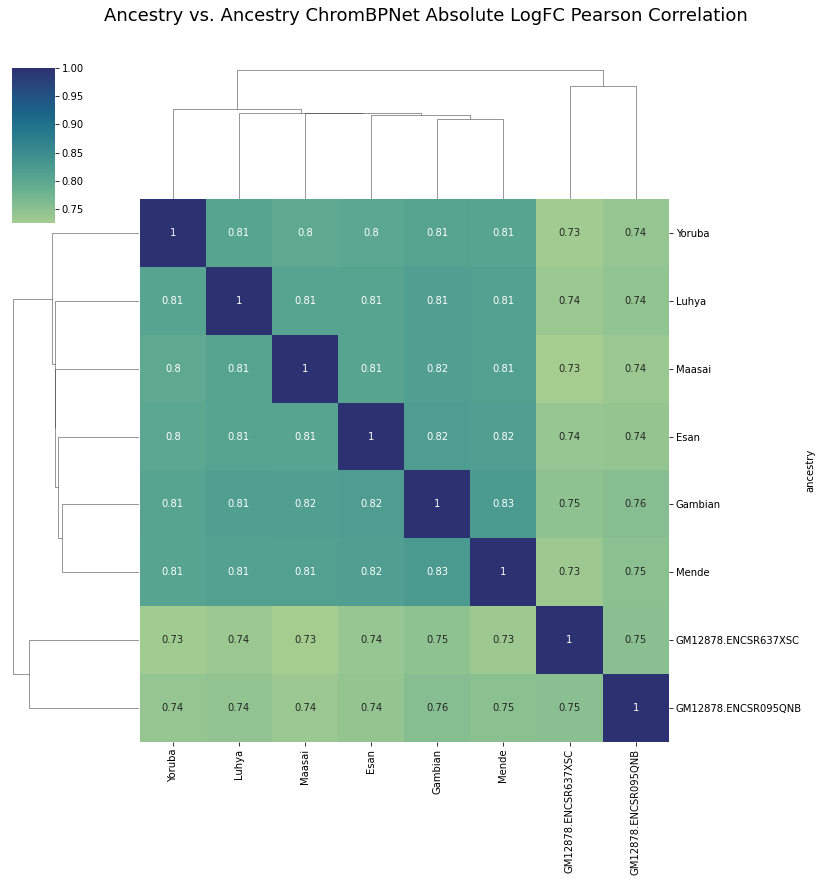

In [44]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation', fontsize=18, y=1.05)

In [45]:
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(allca[outer_ancestry + '.mean.sign.jsd'],
                                                 allca[ancestry + '.mean.sign.jsd'])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df


,GM12878.ENCSR637XSC,Maasai,Yoruba,Luhya,Gambian,Esan,GM12878.ENCSR095QNB,Mende
ancestry,,,,,,,,
GM12878.ENCSR637XSC,1.000000,0.725571,0.730734,0.735344,0.747349,0.740282,0.752435,0.733996
Maasai,0.725571,1.000000,0.796325,0.809070,0.816647,0.806274,0.735885,0.813943
Yoruba,0.730734,0.796325,1.000000,0.806265,0.808546,0.800769,0.740764,0.806431
Luhya,0.735344,0.809070,0.806265,1.000000,0.814617,0.808537,0.744509,0.811847
Gambian,0.747349,0.816647,0.808546,0.814617,1.000000,0.818919,0.755806,0.825278
Esan,0.740282,0.806274,0.800769,0.808537,0.818919,1.000000,0.742561,0.815894
GM12878.ENCSR095QNB,0.752435,0.735885,0.740764,0.744509,0.755806,0.742561,1.000000,0.751026
Mende,0.733996,0.813943,0.806431,0.811847,0.825278,0.815894,0.751026,1.000000


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Effect Size Pearson Correlation')

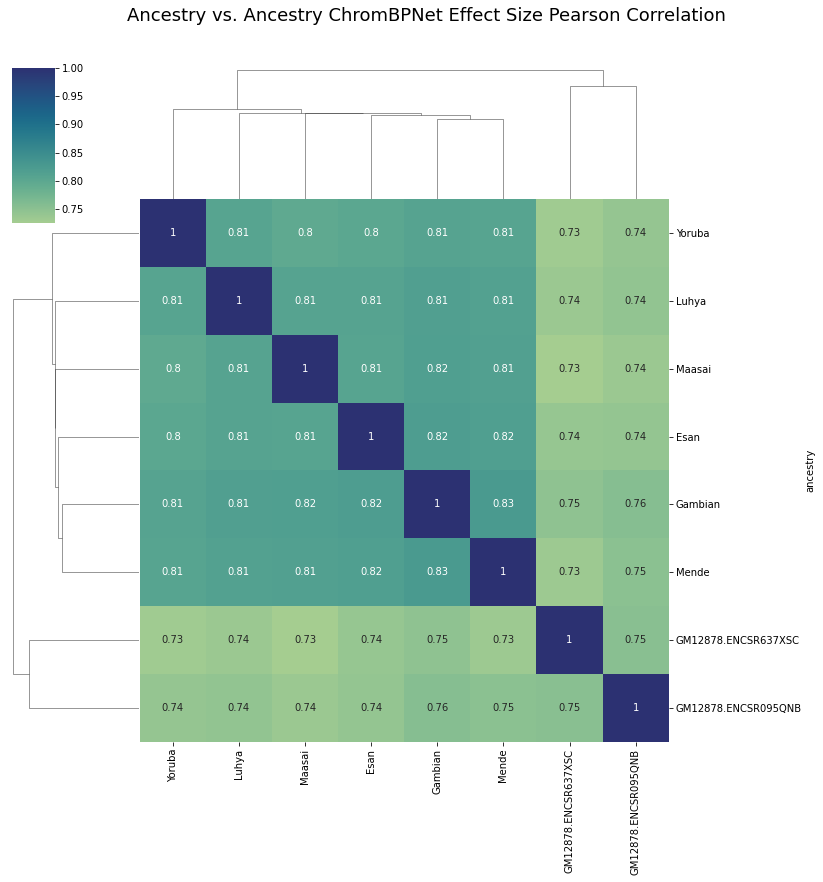

In [46]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Effect Size Pearson Correlation', fontsize=18, y=1.05)